In [10]:
import pandas as pd
import sklearn.preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


data_file = '../data/winequality-white.csv'
headerList = ['고정산도', '휘발성산도', '시트르산', '잔류당분', '염화물', '자유이산화황', '총이산화황', '밀도', 'pH', '황산염', '알콜', '품질']
wineDF = pd.read_csv(data_file, sep=';')
targetDF = wineDF['quality']

In [16]:
len(wineDF.columns)

12

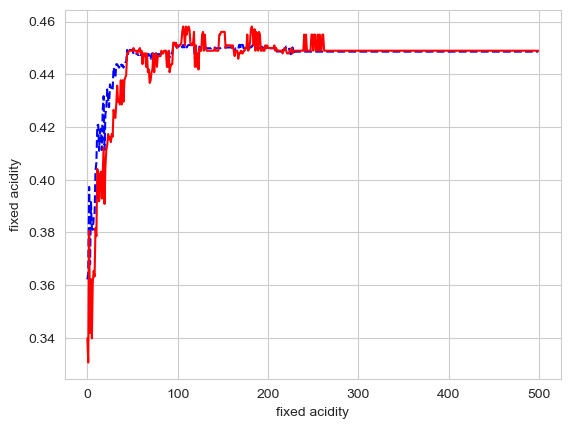

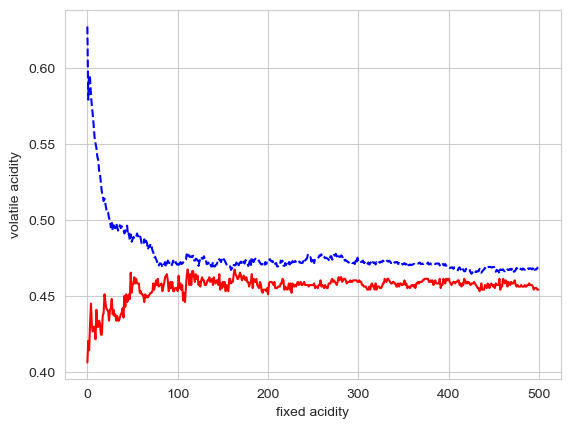

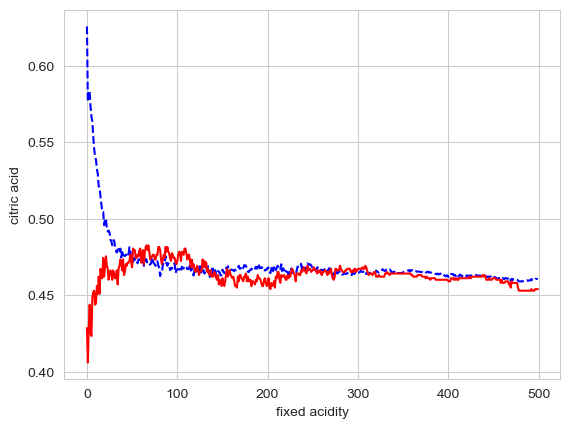

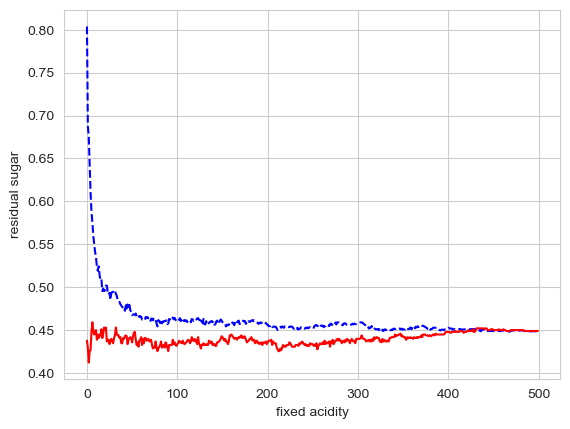

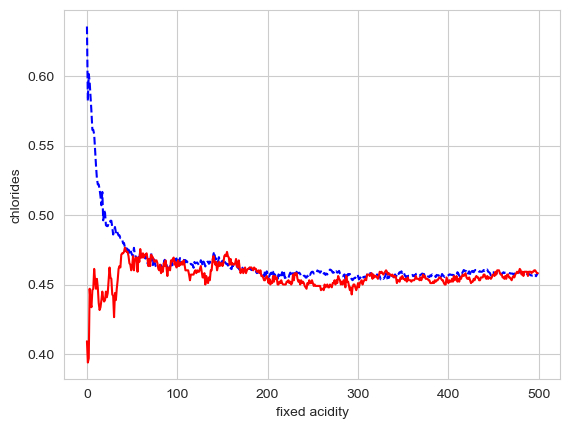

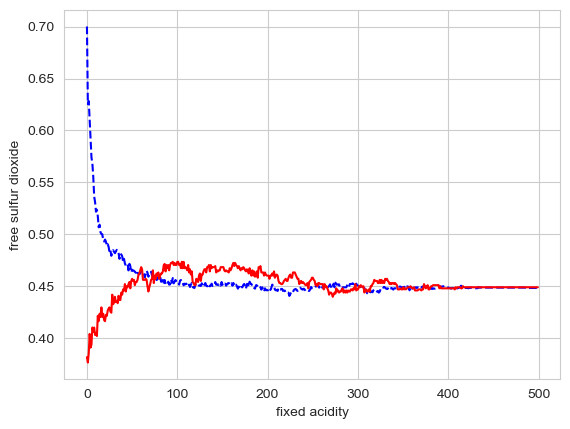

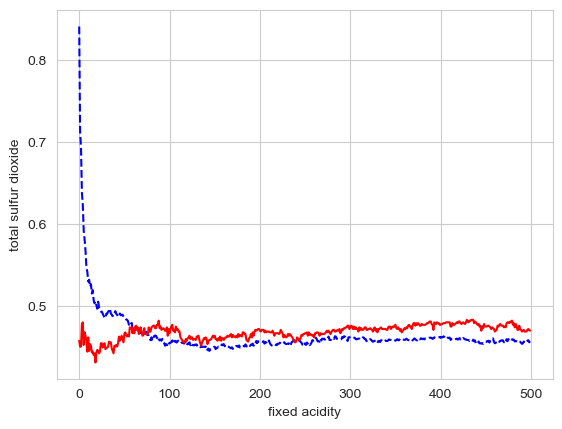

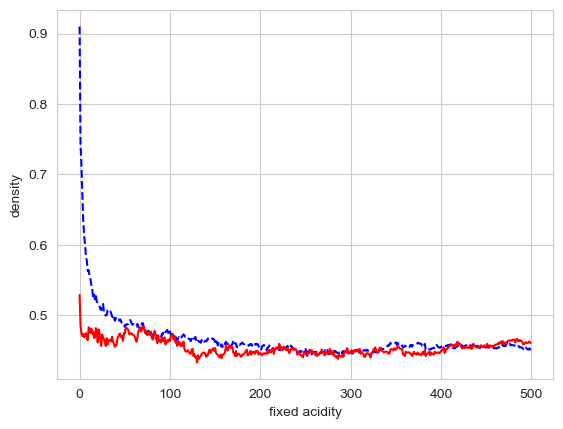

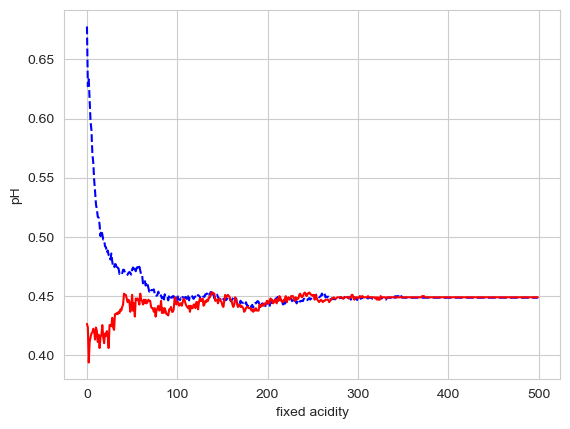

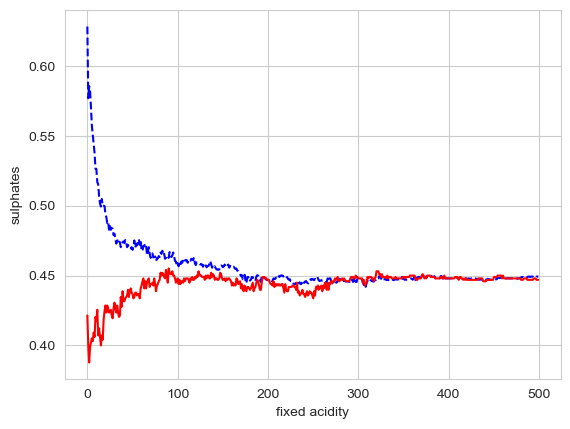

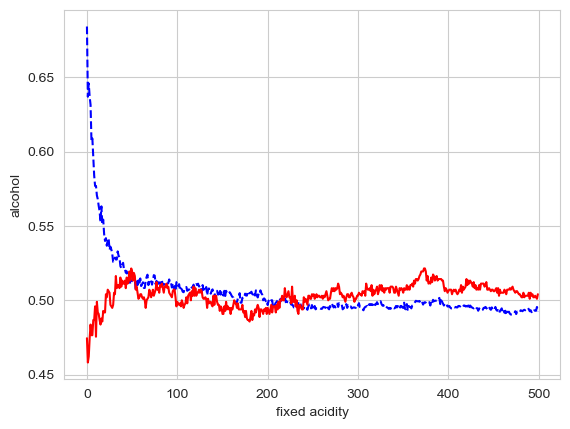

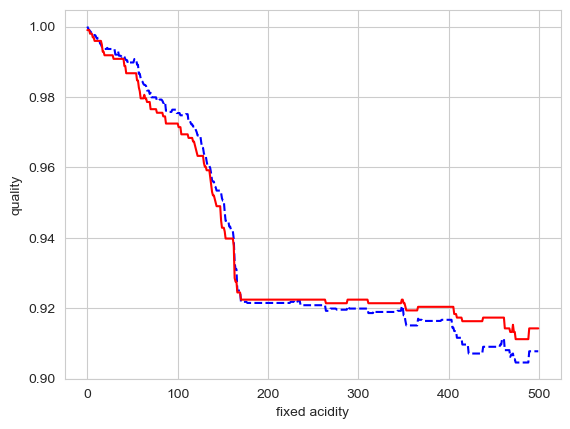

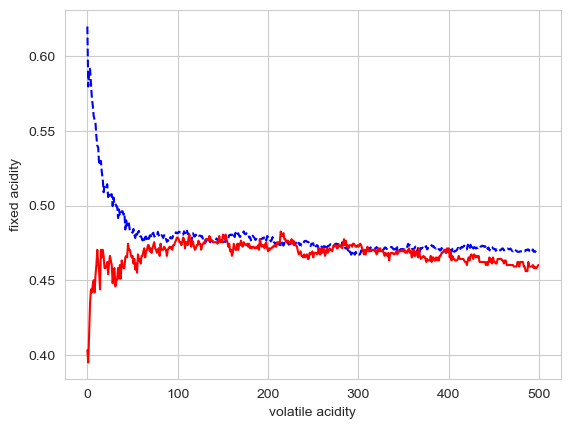

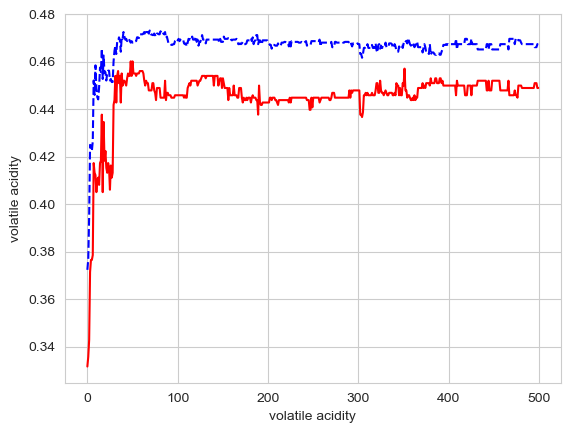

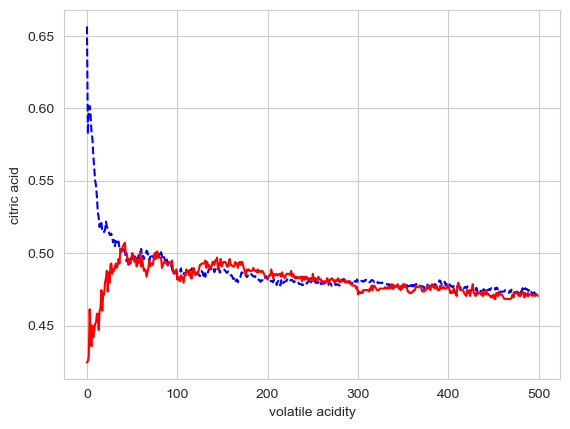

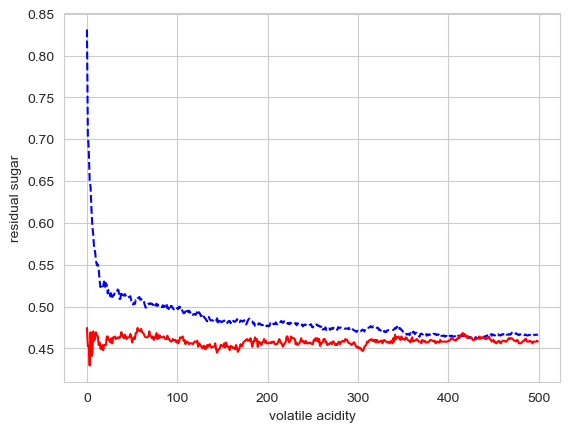

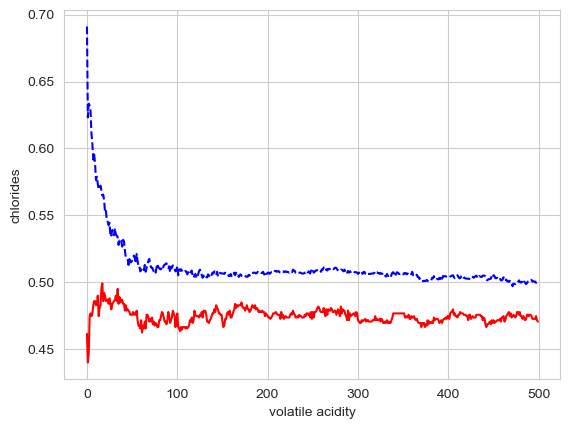

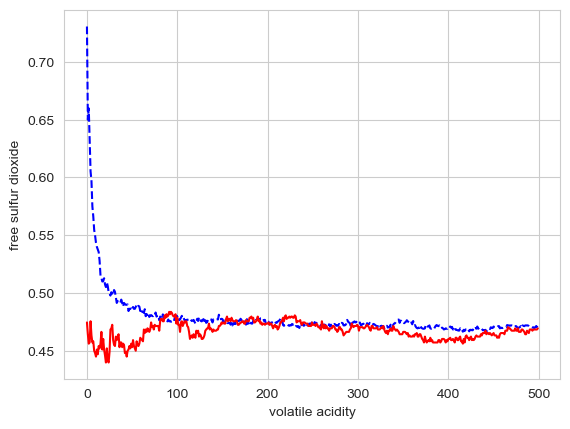

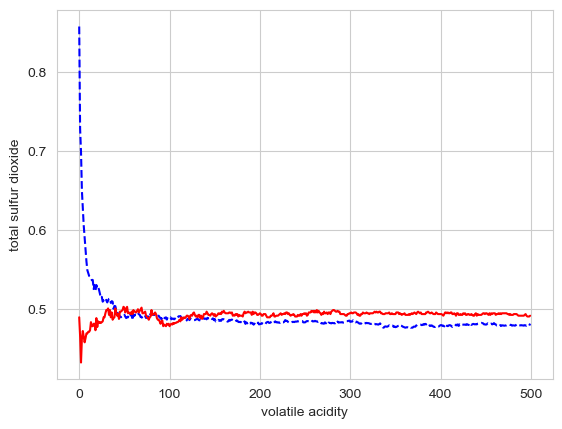

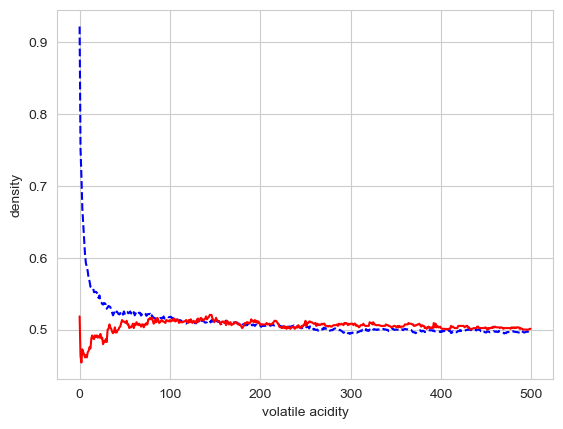

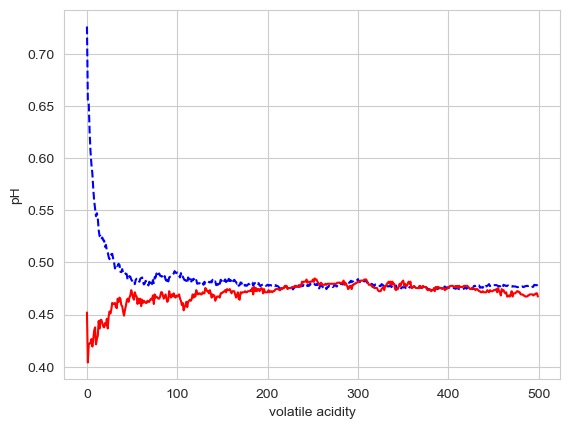

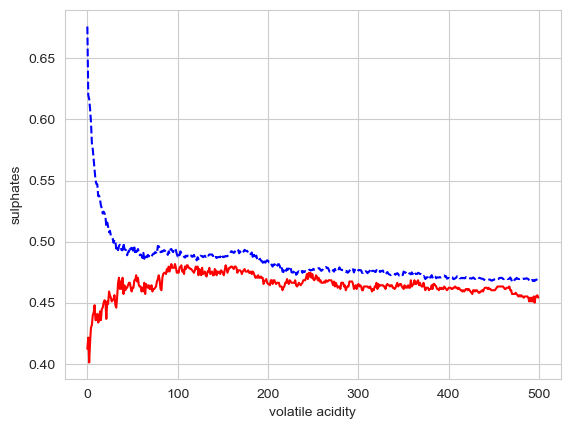

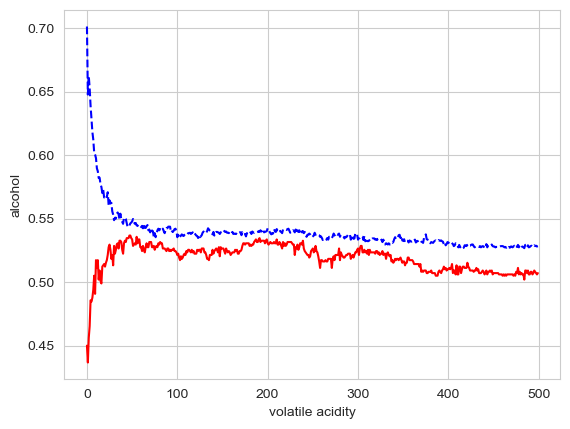

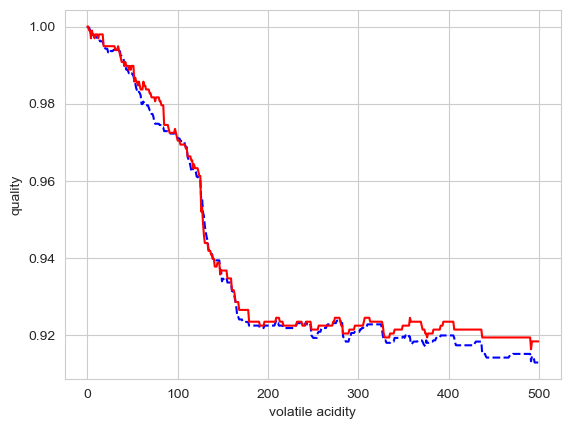

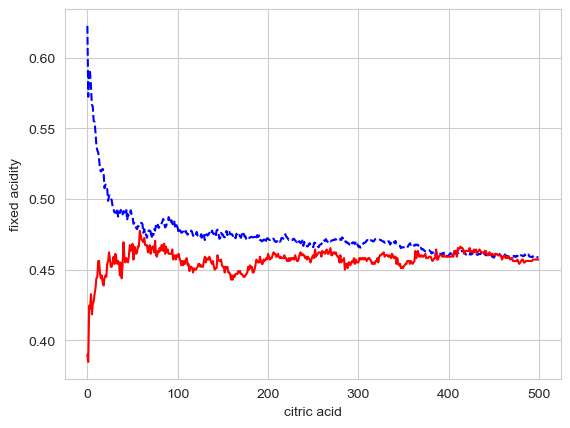

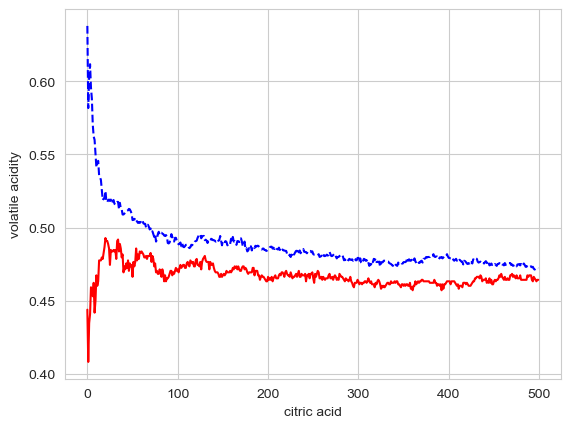

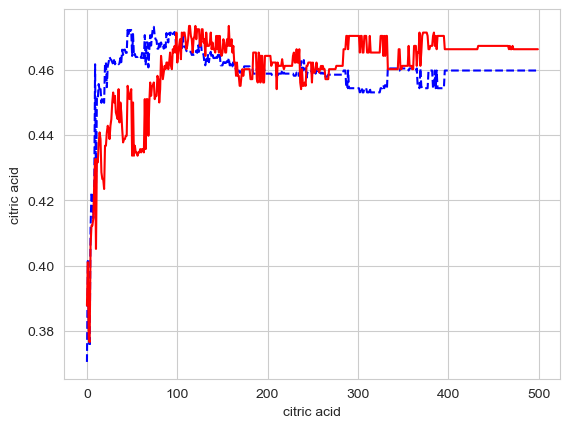

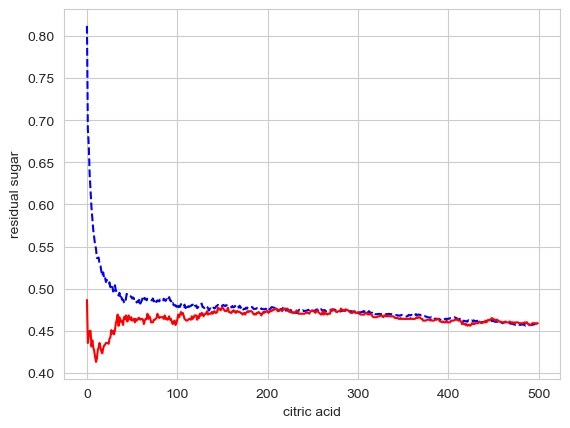

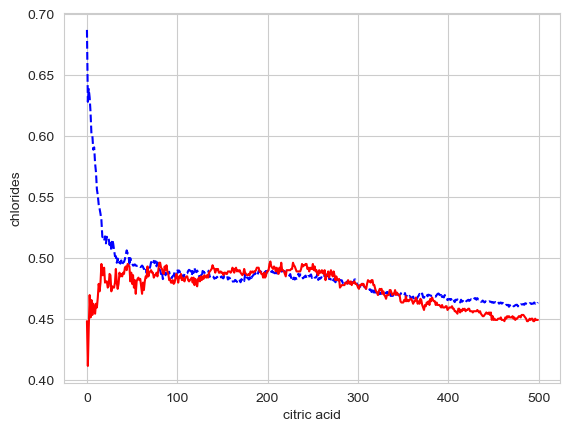

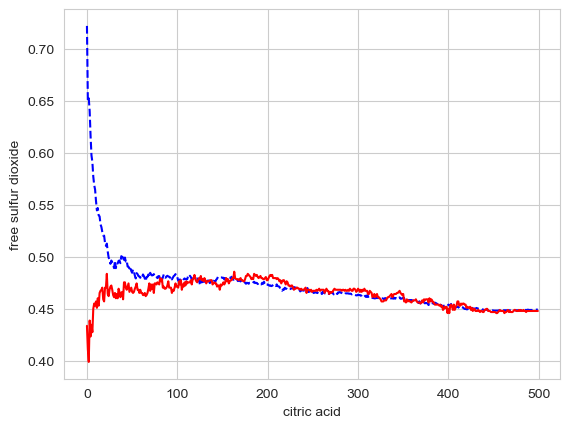

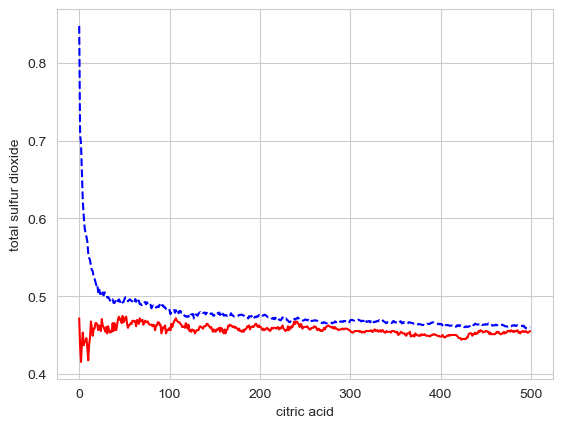

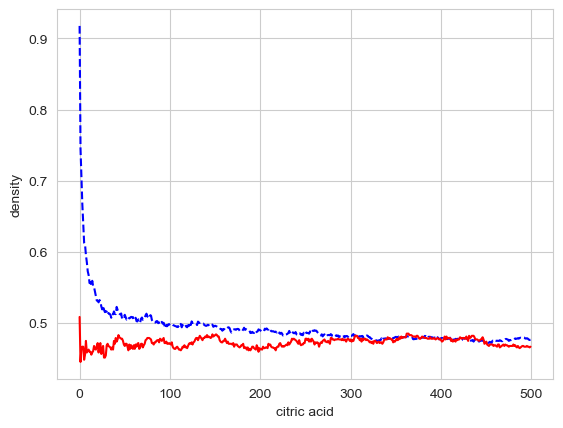

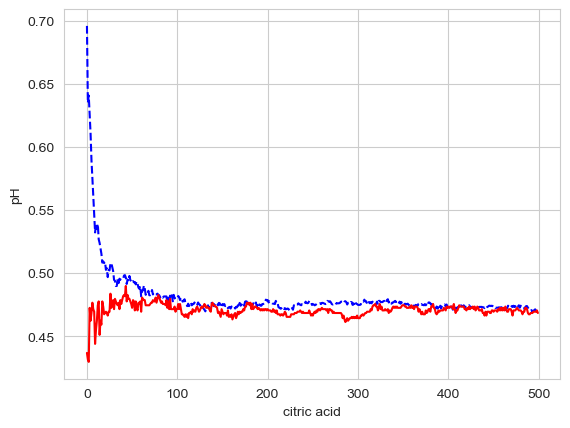

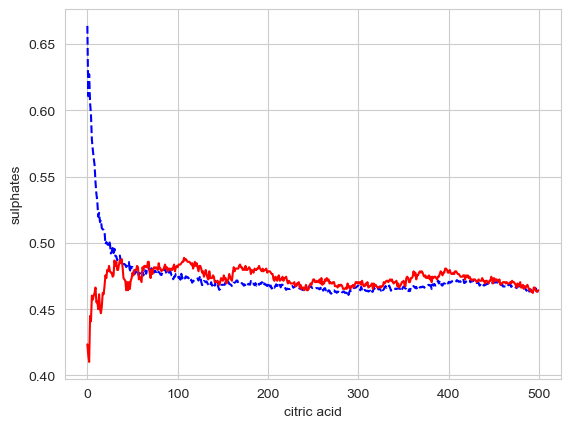

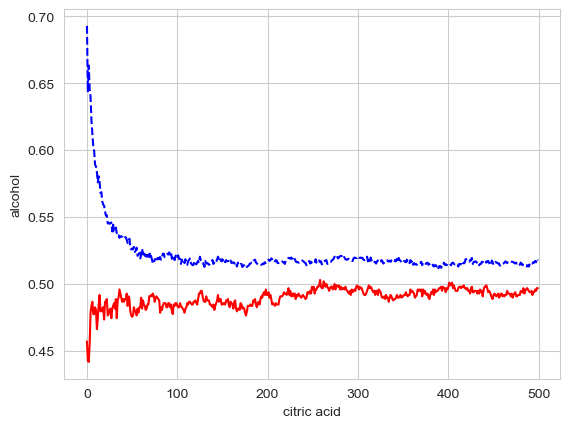

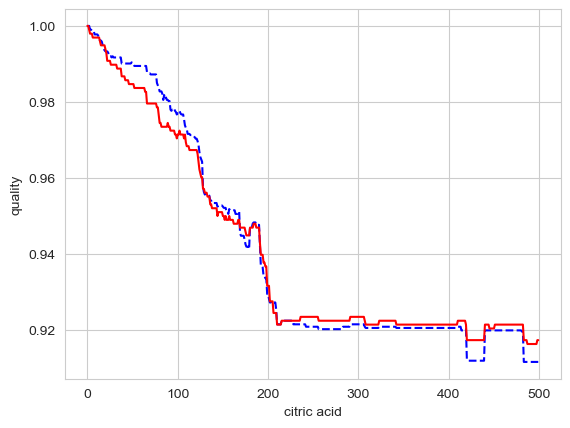

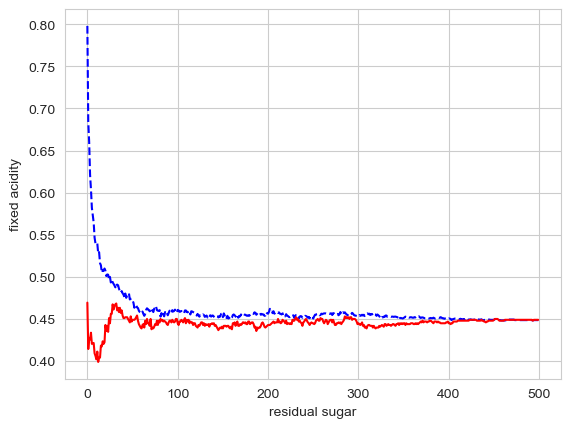

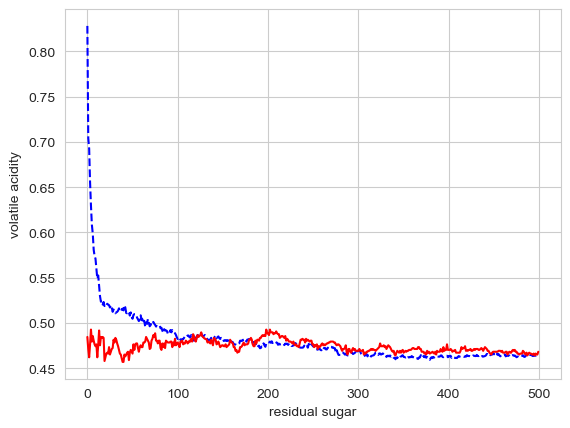

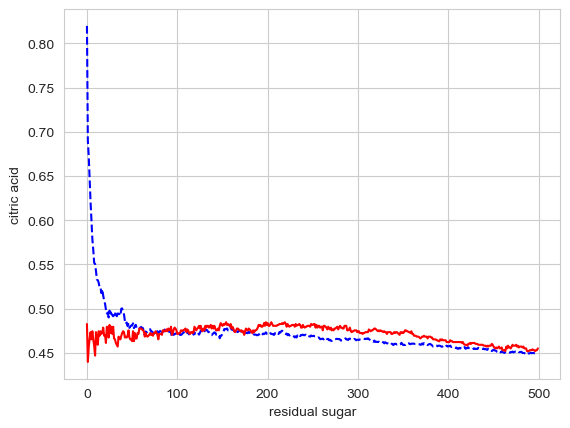

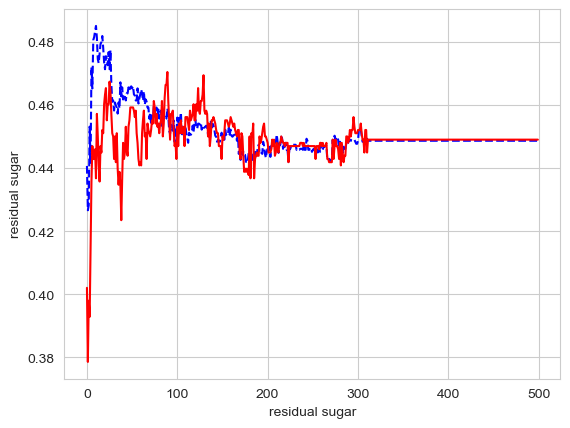

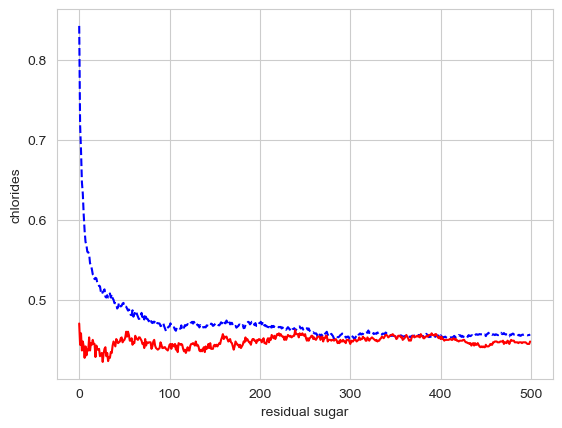

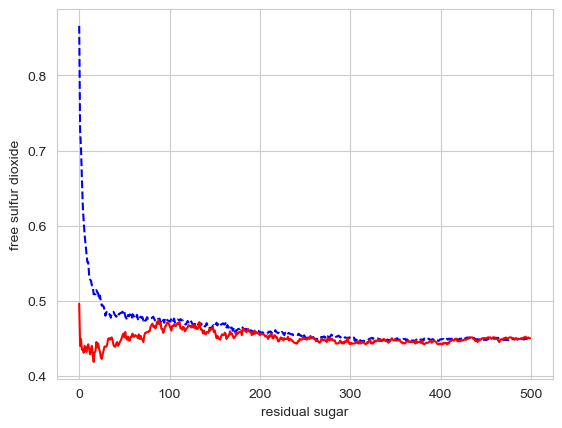

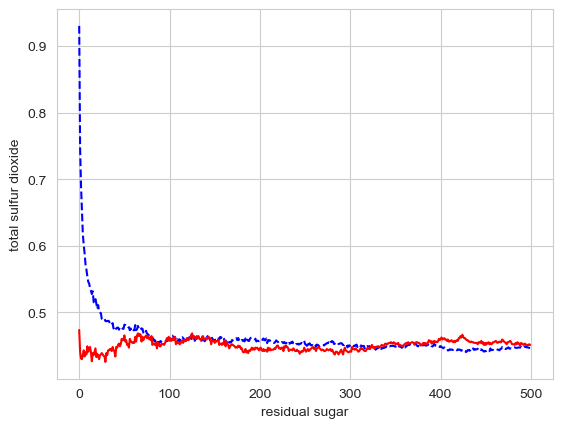

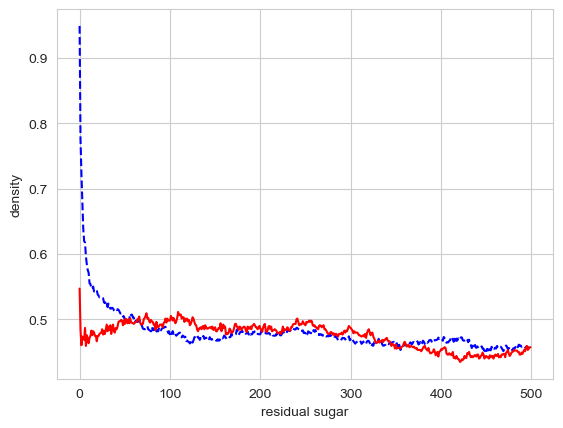

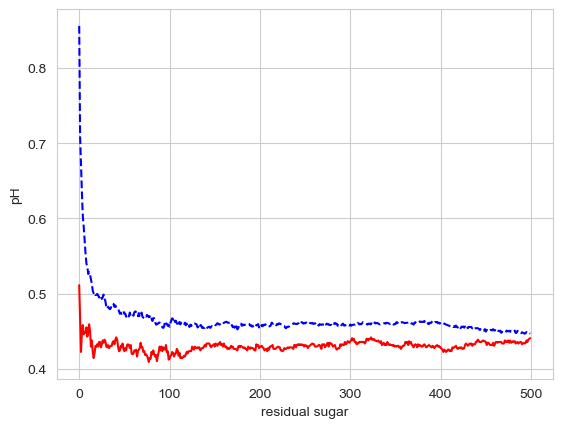

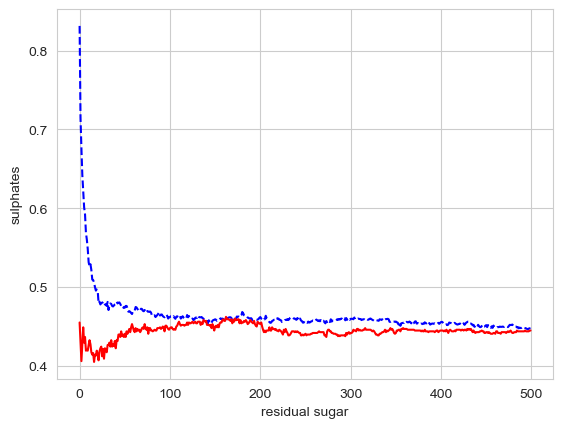

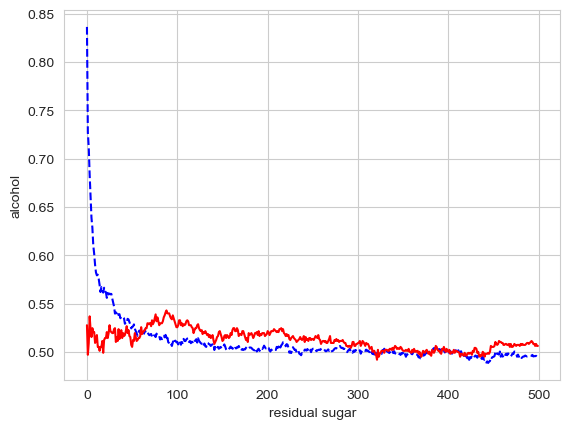

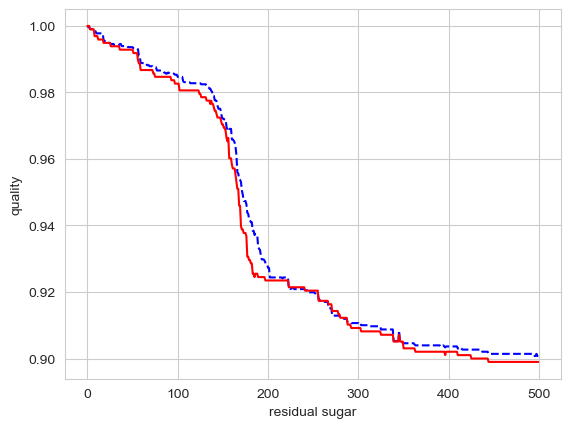

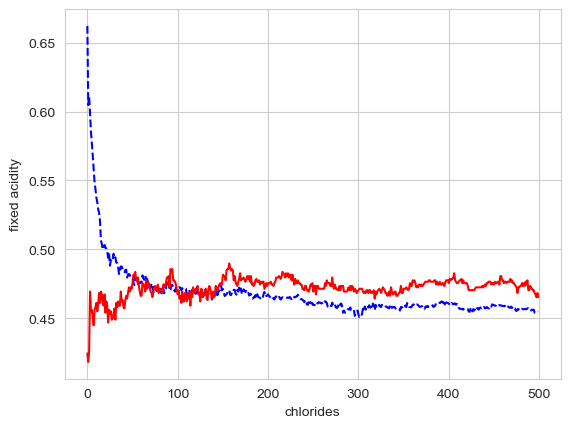

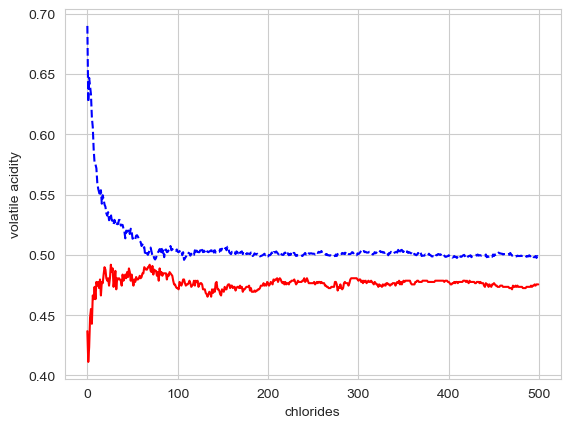

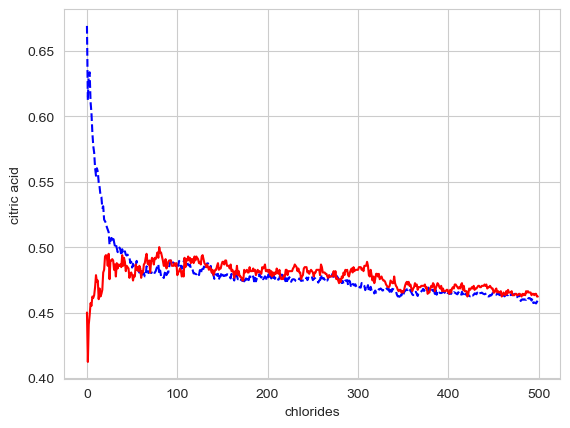

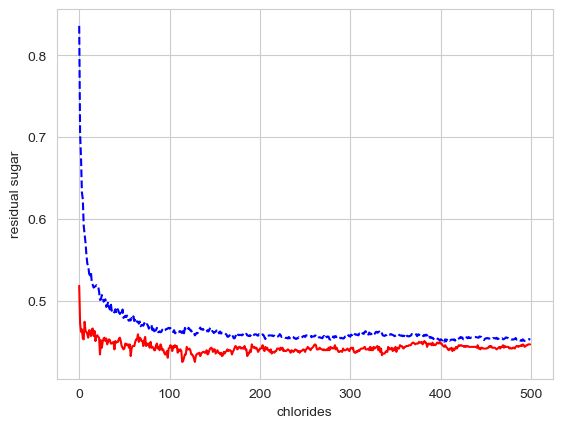

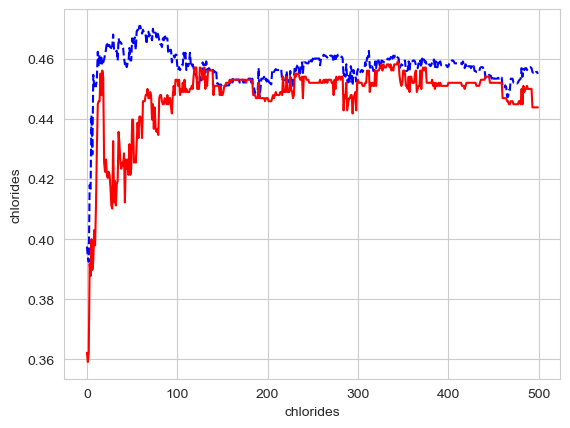

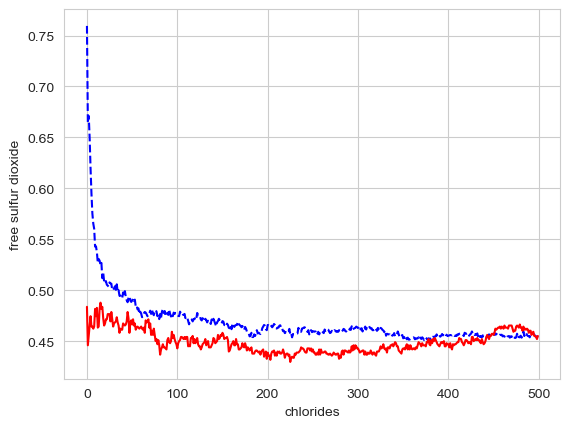

KeyboardInterrupt: 

In [26]:
test = []
train = []

for k in range(len(wineDF.columns)):
    for l in range(len(wineDF.columns)):
        featureDF = wineDF[[wineDF.columns[k], wineDF.columns[l]]]
        
        X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                            targetDF,
                                                            test_size=0.2,
                                                            stratify = targetDF
                                                            )
        X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                      y_train, 
                                                      test_size=0.2, 
                                                      stratify=y_train
                                                      )
        scaler = StandardScaler()
        scaler.fit(X_train)
        scaled_X_train=scaler.transform(X_train)
        scaled_X_test = scaler.transform(X_test)
        
        max_k = scaled_X_train.shape[0]
        
        test_scoreList = []
        train_scoreList = []
        for m in range(1,501):
            wineModel = KNeighborsClassifier(n_neighbors=m)
            wineModel.fit(scaled_X_train, y_train)
            train_scoreList.append(wineModel.score(scaled_X_train,y_train))
            test_scoreList.append(wineModel.score(scaled_X_test,y_test))
        train.append(train_scoreList)
        test.append(test_scoreList)
            
        plt.plot(train_scoreList, 'b--')
        plt.plot(test_scoreList, 'r-')
        plt.xlabel(wineDF.columns[k])
        plt.ylabel(wineDF.columns[l])
        plt.show()